In [33]:
from scipy import stats
from scipy.optimize import fsolve

# Exercise: find when the population of Brazil will double for now, based o this data:
years = list(range(1950, 2011, 10))
population = [51.9, 70, 93.1, 119, 146.8, 169.8, 190.7]

# Assuming double the last population count (2010).
DESIRED_POP = population[-1]*2

# Do some regression
rgr = stats.linregress(years,population)

# Simple linear equation to get the population by year
def EstimatePopulation(x):
    '''
    Uses the linear regression to estimate the population by year(x).
    '''
    return x*rgr.slope + rgr.intercept

# Simple linear equation to get the year by population
def EstimateYear(x):
    '''
    Estimate the year to reach the input population.
    '''
    return (x - rgr.intercept) / rgr.slope

# The first assumption is simple, i only estimate the population using the linear curve that i took from the data:
print('The population of %f will be reached in %d.' % (DESIRED_POP, EstimateYear(DESIRED_POP)))

The population of 381.400000 will be reached in 2089.


In [77]:
# Now, i must assume some maximum load on the system.
SYS_LOAD = population[-1]*8

def EstimateYearWithLoad(year):
    '''
    Estimates the population for a year based on the maximum load of people on the country.
    '''
    pop = EstimatePopulation(year)
    return pop*(1-pop/SYS_LOAD)

# The solver will search for zero.
def f(x):
    return DESIRED_POP - EstimateYearWithLoad(x)

# Finds the year where this populatio should de breached.
result_year = fsolve(f, 2100)[-1]
print('The population of %f will be reached in %d.' % (DESIRED_POP, result_year))

The population of 381.400000 will be reached in 2248.


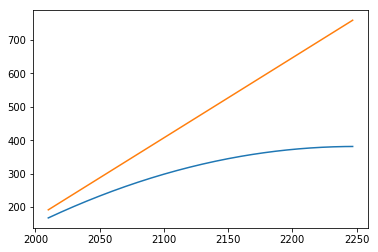

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

cur1 = np.array(range(2010, int(result_year), 1))

plt.plot(cur1, EstimateYearWithLoad(cur1))
plt.plot(cur1, EstimatePopulation(cur1))
plt.show()